In [1]:
%load_ext autoreload
%autoreload 2

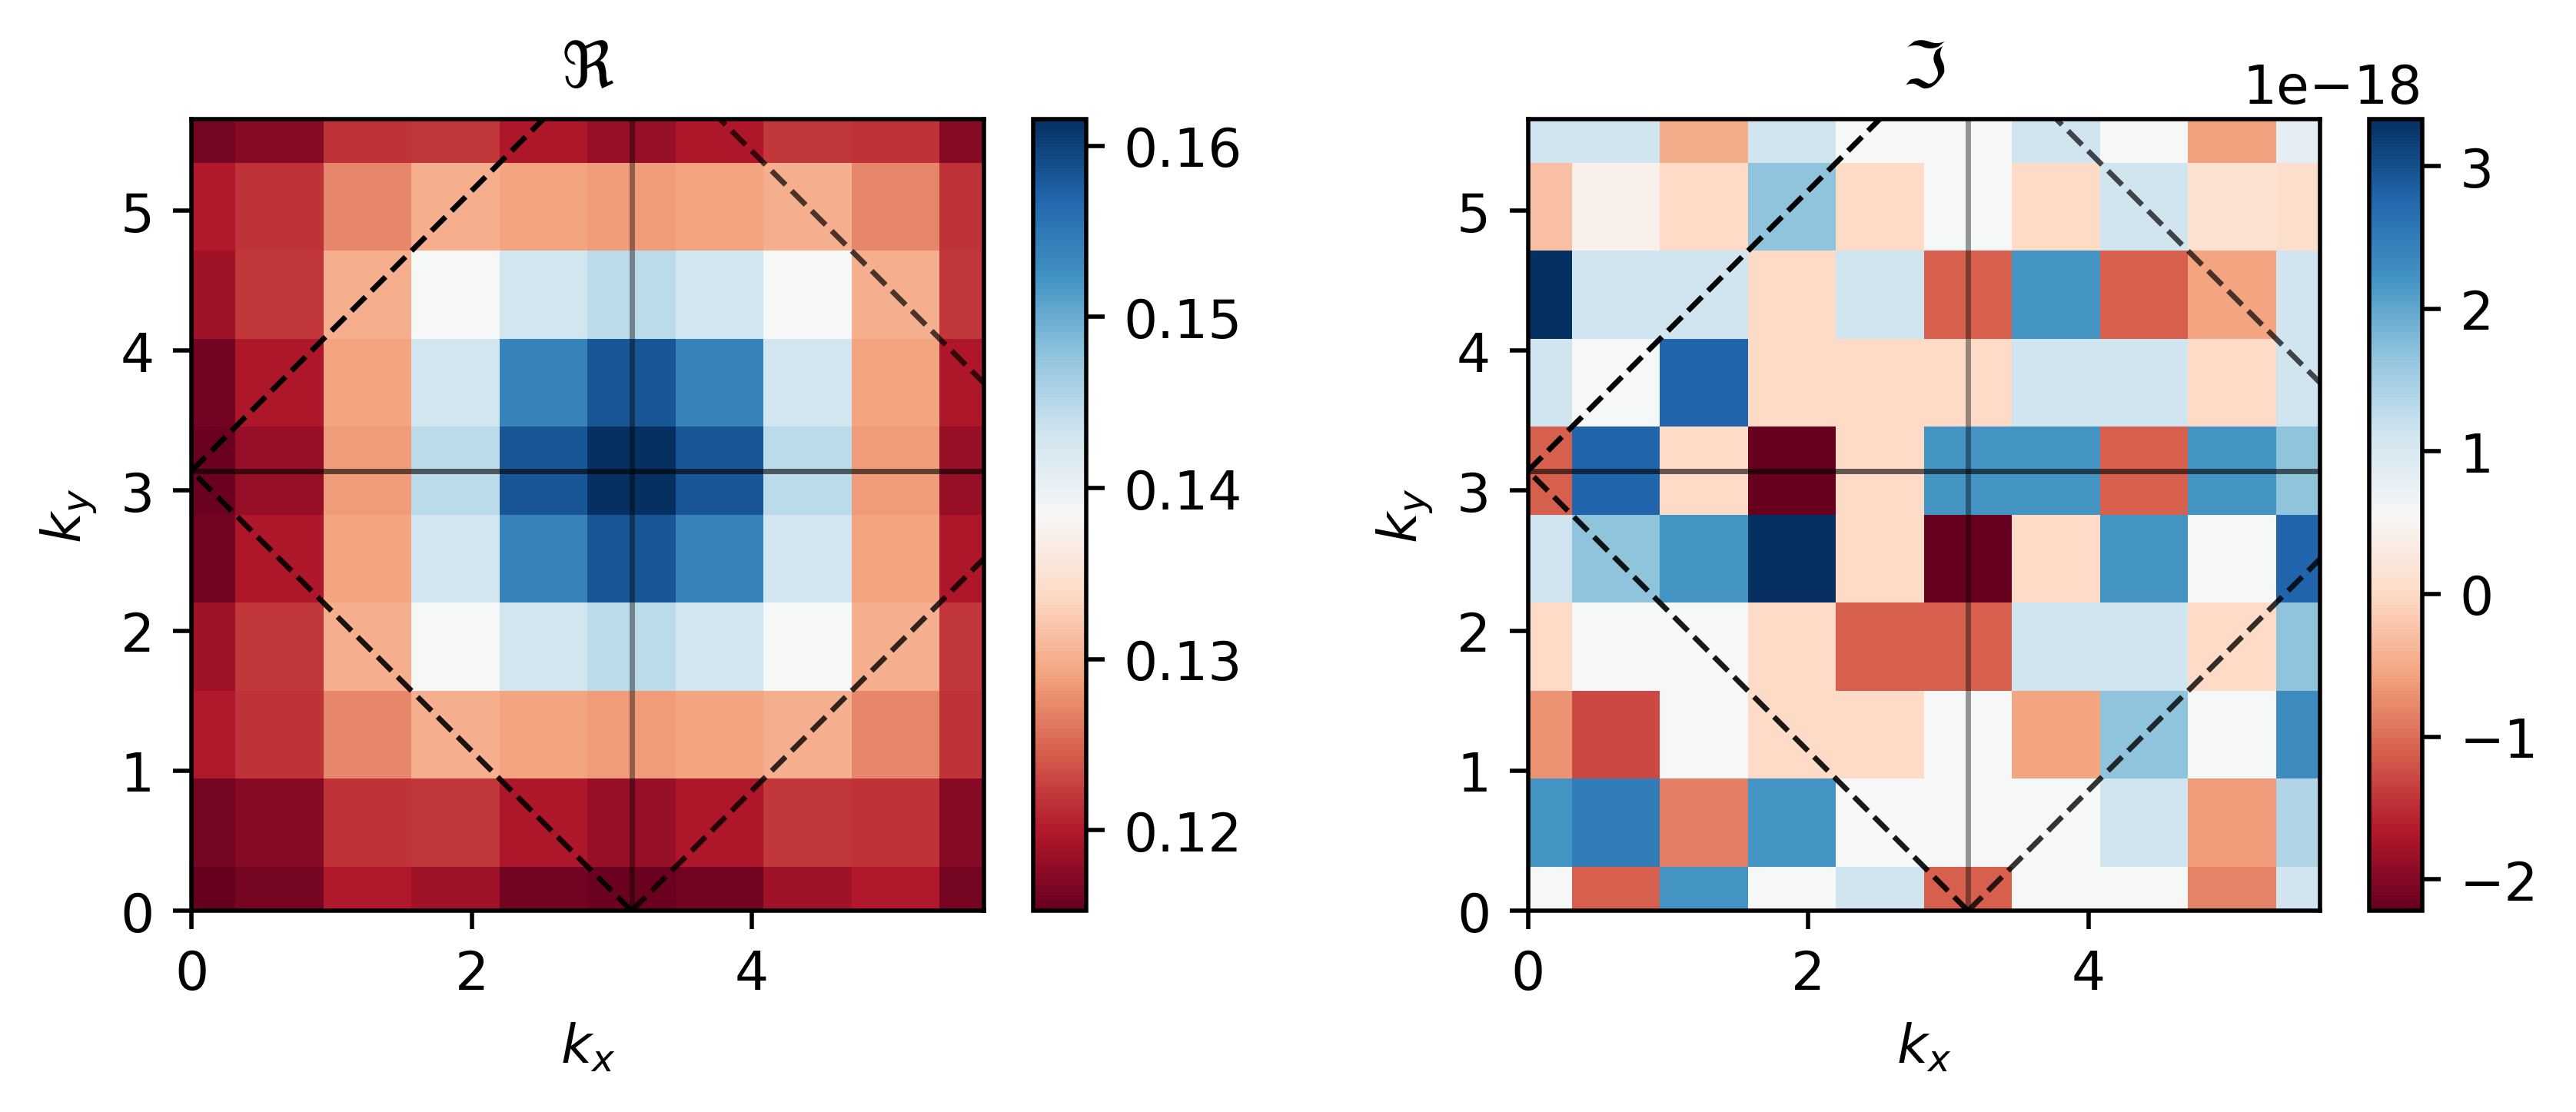

In [2]:

import numpy as np
import matplotlib.pyplot as plt

import dga.brillouin_zone as bz
import dga.wannier as wannier
import dga.bubble as bubble
import dga.matsubara_frequencies as mf
import tests.TestData as td
import dga.two_point as twop
import dga.plotting as plotting

nk = (10,10,1)

sym = bz.simultaneous_x_y_inversion()
k_grid = bz.KGrid(nk,sym)

hr = wannier.WannierHr(*wannier.wannier_one_band_2d_nematic(1,0.1,0.1,0.0,-0.01))
ek = hr.get_ek(k_grid)
bz_path_string = 'Gamma-X-M-Gamma-Y-M-Gamma'
k_path = bz.KPath(nk,bz_path_string)
#
# plt.figure()
# plt.plot(k_path.k_axis,k_path.map_to_kpath(ek),'-k')
# plt.xticks(k_path.x_ticks,k_path.labels)
# plt.ylabel('Energy [t]')
# plt.show()
# k_path.plot_kpath(ek.real,verbose=True, do_save=False)

# plt.figure()
# plt.pcolormesh(k_grid.kx_shift,k_grid.ky_shift,k_grid.shift_mat_by_pi(ek.real[:,:,0].T,axes=(0,1)),cmap='RdBu')
# plt.colorbar()
# plt.show()

ek_irrk = k_grid.map_fbz2irrk(ek)
ek_bz2fbz = k_grid.map_irrk2fbz(ek_irrk)
assert np.allclose(ek,ek_bz2fbz)

# plt.figure()
# plt.pcolormesh(k_grid.kx_shift,k_grid.ky_shift,k_grid.shift_mat_by_pi(ek_bz2fbz.real[:,:,0].T,axes=(0,1)),cmap='RdBu')
# plt.colorbar()
# plt.show()


ddict, hr  = td.load_minimal_dataset()
sym = bz.two_dimensional_square_symmetries()
k_grid = bz.KGrid(nk,sym)
ek = hr.get_ek(k_grid)
siw = ddict['siw']
beta = ddict['beta']
n = ddict['n']
siw_dmft = twop.SelfEnergy(siw[None,None,None,:],beta)
giwk_dmft = twop.GreensFunction(siw_dmft,ek,n=n)


# plotting.plot_kx_ky(giwk_dmft.fs(pi_shift=False)[:,:,0],k_grid.kx,k_grid.ky,do_save=False,verbose=True)

q_grid = bz.KGrid(nk,sym)
# q_list = q_grid.get_q_list()
q_list = q_grid.get_irrq_list()
giwk_q_shift = bz.shift_mat_by_ind(giwk_dmft.fs(pi_shift=False),q_list[10])
# plotting.plot_kx_ky(giwk_q_shift[:,:,0],k_grid.kx,k_grid.ky,do_save=False,verbose=True)

giwk_b2fbz = k_grid.map_irrk2fbz(k_grid.map_fbz2irrk(giwk_dmft.g_full()))
assert np.allclose(giwk_dmft.g_full(),giwk_b2fbz)

niw = 25
wn = mf.wn(25)
bubble_gen = bubble.BubbleGenerator(wn,giwk_dmft)

q_list = q_grid.get_irrq_list()
q_list_fbz = q_grid.get_q_list()
chi0_q = bubble_gen.get_chi0_q_list(niv=100,q_list=q_list_fbz)
# chi0_q_fbz = q_grid.map_irrk2fbz(chi0_q)
chi0_q_fbz = k_grid.map_fbz_list2mesh(chi0_q)
plotting.plot_kx_ky(chi0_q_fbz[:,:,0,niw],k_grid.kx,k_grid.ky,do_save=False,verbose=True)



i=0 q=array([0, 0, 0])
i=1 q=array([0, 1, 0])
i=2 q=array([0, 2, 0])
i=3 q=array([0, 3, 0])
i=4 q=array([0, 4, 0])
i=5 q=array([0, 5, 0])
i=6 q=array([0, 6, 0])
i=7 q=array([0, 7, 0])
i=8 q=array([1, 0, 0])
i=9 q=array([1, 1, 0])
i=10 q=array([1, 2, 0])
i=11 q=array([1, 3, 0])
i=12 q=array([1, 4, 0])
i=13 q=array([1, 5, 0])
i=14 q=array([1, 6, 0])
i=15 q=array([1, 7, 0])
i=16 q=array([2, 0, 0])
i=17 q=array([2, 1, 0])
i=18 q=array([2, 2, 0])
i=19 q=array([2, 3, 0])
i=20 q=array([2, 4, 0])
i=21 q=array([2, 5, 0])
i=22 q=array([2, 6, 0])
i=23 q=array([2, 7, 0])
i=24 q=array([3, 0, 0])
i=25 q=array([3, 1, 0])
i=26 q=array([3, 2, 0])
i=27 q=array([3, 3, 0])
i=28 q=array([3, 4, 0])
i=29 q=array([3, 5, 0])
i=30 q=array([3, 6, 0])
i=31 q=array([3, 7, 0])
i=32 q=array([4, 0, 0])
i=33 q=array([4, 1, 0])
i=34 q=array([4, 2, 0])
i=35 q=array([4, 3, 0])
i=36 q=array([4, 4, 0])
i=37 q=array([4, 5, 0])
i=38 q=array([4, 6, 0])
i=39 q=array([4, 7, 0])
i=40 q=array([5, 0, 0])
i=41 q=array([5, 1, 0])
i=

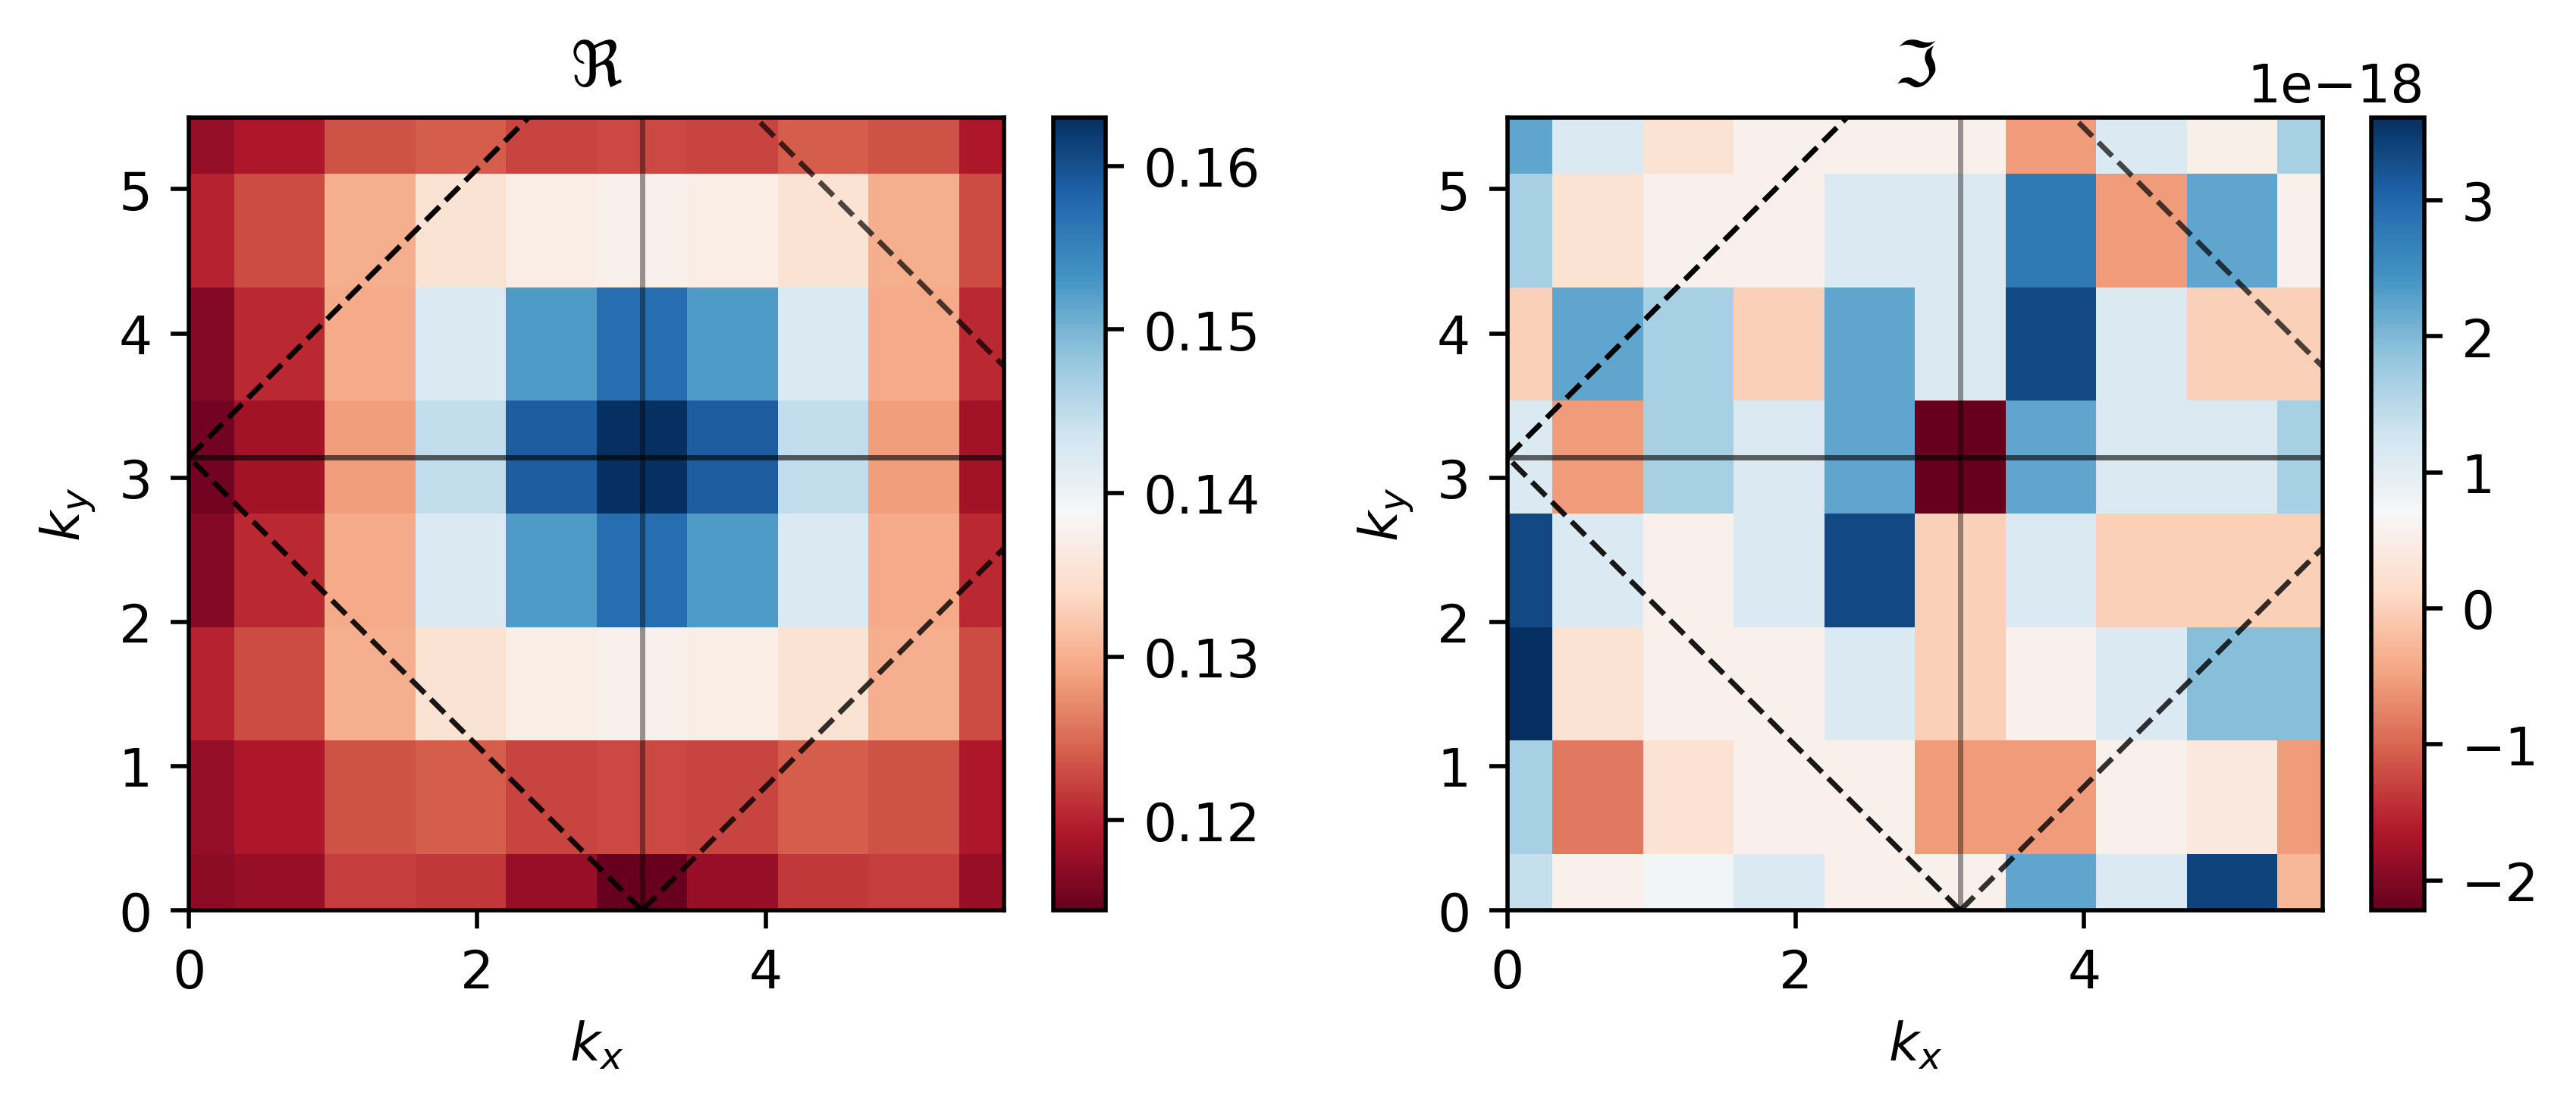

In [77]:
nk2 = (10,8,1)
k_grid2 = bz.KGrid(nk2,sym)
q_grid2 = bz.KGrid(nk2,sym)
ek2 = hr.get_ek(k_grid2)
giwk_dmft2 = twop.GreensFunction(siw_dmft,ek2,n=n)
bubble_gen2 = bubble.BubbleGenerator(wn,giwk_dmft2)

q_list_fbz2 = q_grid2.get_q_list()
chi0_q2 = bubble_gen2.get_chi0_q_list(niv=100,q_list=q_list_fbz2)
chi0_q_fbz2 = q_grid2.map_fbz_list2mesh(chi0_q2)
plotting.plot_kx_ky(chi0_q_fbz2[:,:,0,niw],q_grid2.kx,q_grid2.ky,do_save=False,verbose=True)

In [20]:
chi0 = bubble_gen.get_chi0_single_q(niv=100,q=(5,3,0))
chi02 = bubble_gen2.get_chi0_single_q(niv=100,q=(5,5,0))
print(f'{chi0[niw]=}')
print(f'{chi02[niw]=}')
giwk_dmft2.g_full().shape

chi0[niw]=(0.1447044377185684-1.1102230246251566e-18j)
chi02[niw]=(0.15718525156872865+1.1102230246251566e-18j)


(10, 8, 1, 4506)

In [48]:
chi03 = bubble_gen2.get_chi0_q_list(niv=100,q_list=[(0,0,0),(4,3,0),])[1]
chi02 = bubble_gen2.get_chi0_single_q(niv=100,q=(4,3,0))
print(f'{chi03[niw]=}')
print(f'{chi02[niw]=}')

chi03[niw]=(0.15243598020583082+3.3306690738754695e-18j)
chi02[niw]=(0.15243598020583082+3.3306690738754695e-18j)


In [43]:
q_mesh_fbz2 = q_grid2.map_fbz_list2mesh(q_list_fbz2)
q_mesh_fbz2[4,3,0,:]

array([4, 3, 0])

In [57]:
chi0_q2_list = bubble_gen2.get_chi0_q_list(niv=100,q_list=q_list_fbz2)

i=0 q=array([0, 0, 0])
i=1 q=array([0, 1, 0])
i=2 q=array([0, 2, 0])
i=3 q=array([0, 3, 0])
i=4 q=array([0, 4, 0])
i=5 q=array([0, 5, 0])
i=6 q=array([0, 6, 0])
i=7 q=array([0, 7, 0])
i=8 q=array([1, 0, 0])
i=9 q=array([1, 1, 0])
i=10 q=array([1, 2, 0])
i=11 q=array([1, 3, 0])
i=12 q=array([1, 4, 0])
i=13 q=array([1, 5, 0])
i=14 q=array([1, 6, 0])
i=15 q=array([1, 7, 0])
i=16 q=array([2, 0, 0])
i=17 q=array([2, 1, 0])
i=18 q=array([2, 2, 0])
i=19 q=array([2, 3, 0])
i=20 q=array([2, 4, 0])
i=21 q=array([2, 5, 0])
i=22 q=array([2, 6, 0])
i=23 q=array([2, 7, 0])
i=24 q=array([3, 0, 0])
i=25 q=array([3, 1, 0])
i=26 q=array([3, 2, 0])
i=27 q=array([3, 3, 0])
i=28 q=array([3, 4, 0])
i=29 q=array([3, 5, 0])
i=30 q=array([3, 6, 0])
i=31 q=array([3, 7, 0])
i=32 q=array([4, 0, 0])
i=33 q=array([4, 1, 0])
i=34 q=array([4, 2, 0])
i=35 q=array([4, 3, 0])
i=36 q=array([4, 4, 0])
i=37 q=array([4, 5, 0])
i=38 q=array([4, 6, 0])
i=39 q=array([4, 7, 0])
i=40 q=array([5, 0, 0])
i=41 q=array([5, 1, 0])
i=

In [76]:
indx = 0
indy = 1
chi02 = bubble_gen2.get_chi0_single_q(niv=100,q=(indx,indy,0))
chi0_q2_mesh = q_grid2.map_fbz_list2mesh(chi0_q2_list)
# print(f'{chi0_q2_list[0,niw]=}')
print(f'{chi02[niw]=}')
print(f'{chi0_q2_mesh[indx,indy,0,niw]=}')
print(f'{chi02[niw]-chi0_q2_mesh[indx,indy,0,niw]}')
print(q_list_fbz2[0])

chi02[niw]=(0.11735213908734185+1.6653345369377347e-18j)
chi0_q2_mesh[indx,indy,0,niw]=(0.11735213908734185+1.6653345369377347e-18j)
0j
[0 0 0]


In [67]:
chi0_q2_mesh.shape


25

(10, 8, 1, 3)


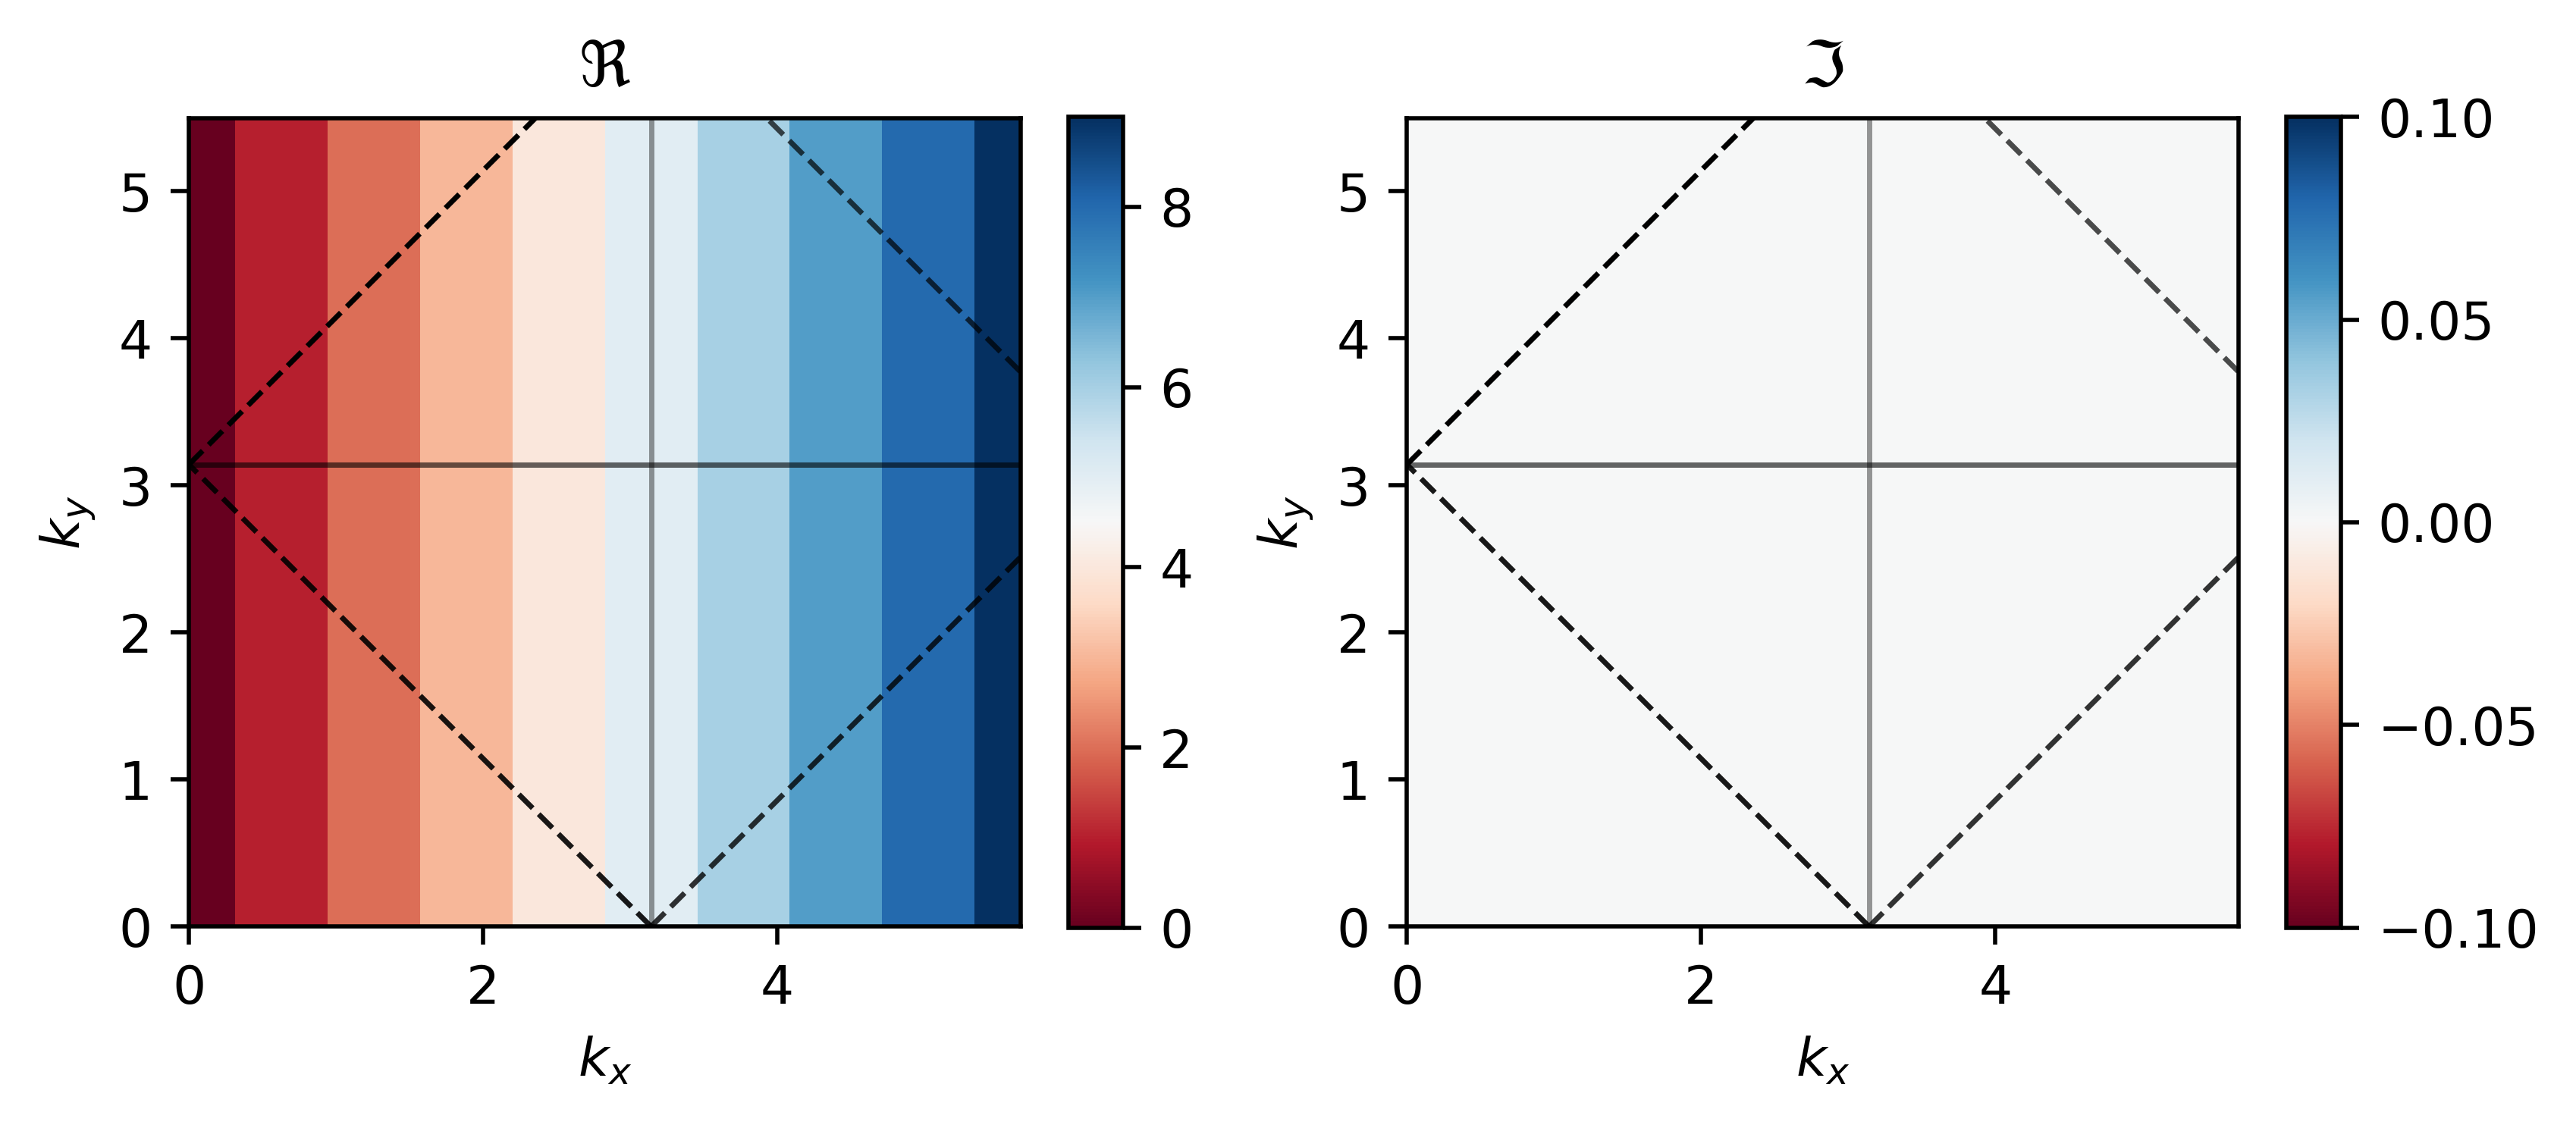

In [5]:
q_list_mesh2 = q_grid2.map_fbz_list2mesh(q_list_fbz2)
print(q_list_mesh2.shape)
plotting.plot_kx_ky(q_list_mesh2[:,:,0,0],q_grid2.kx,q_grid2.ky,verbose=True,do_save=False)

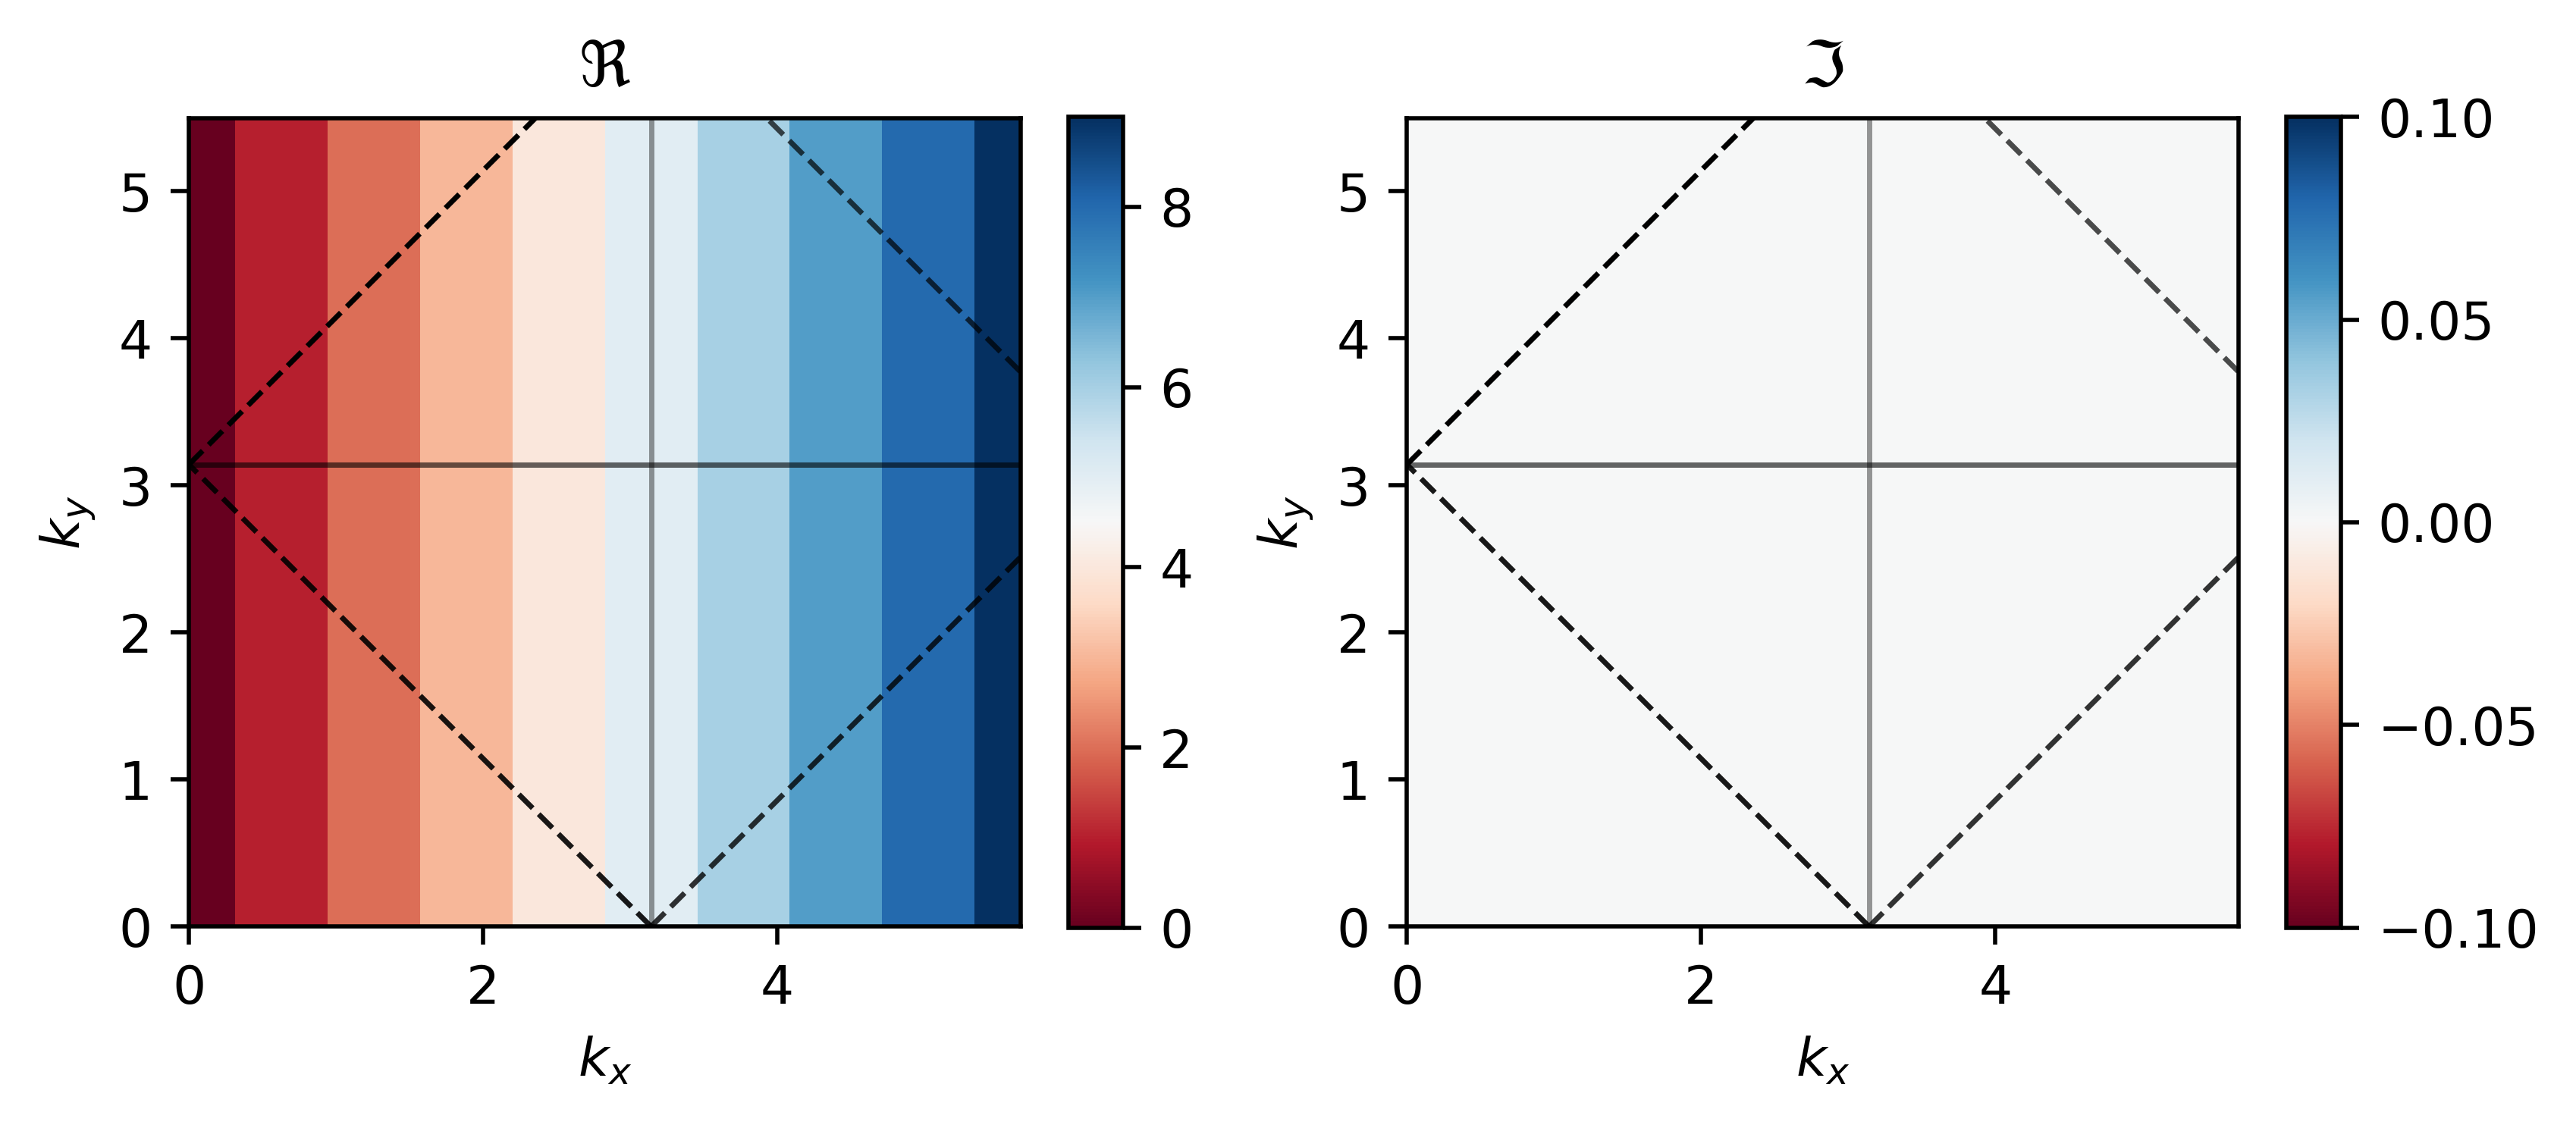

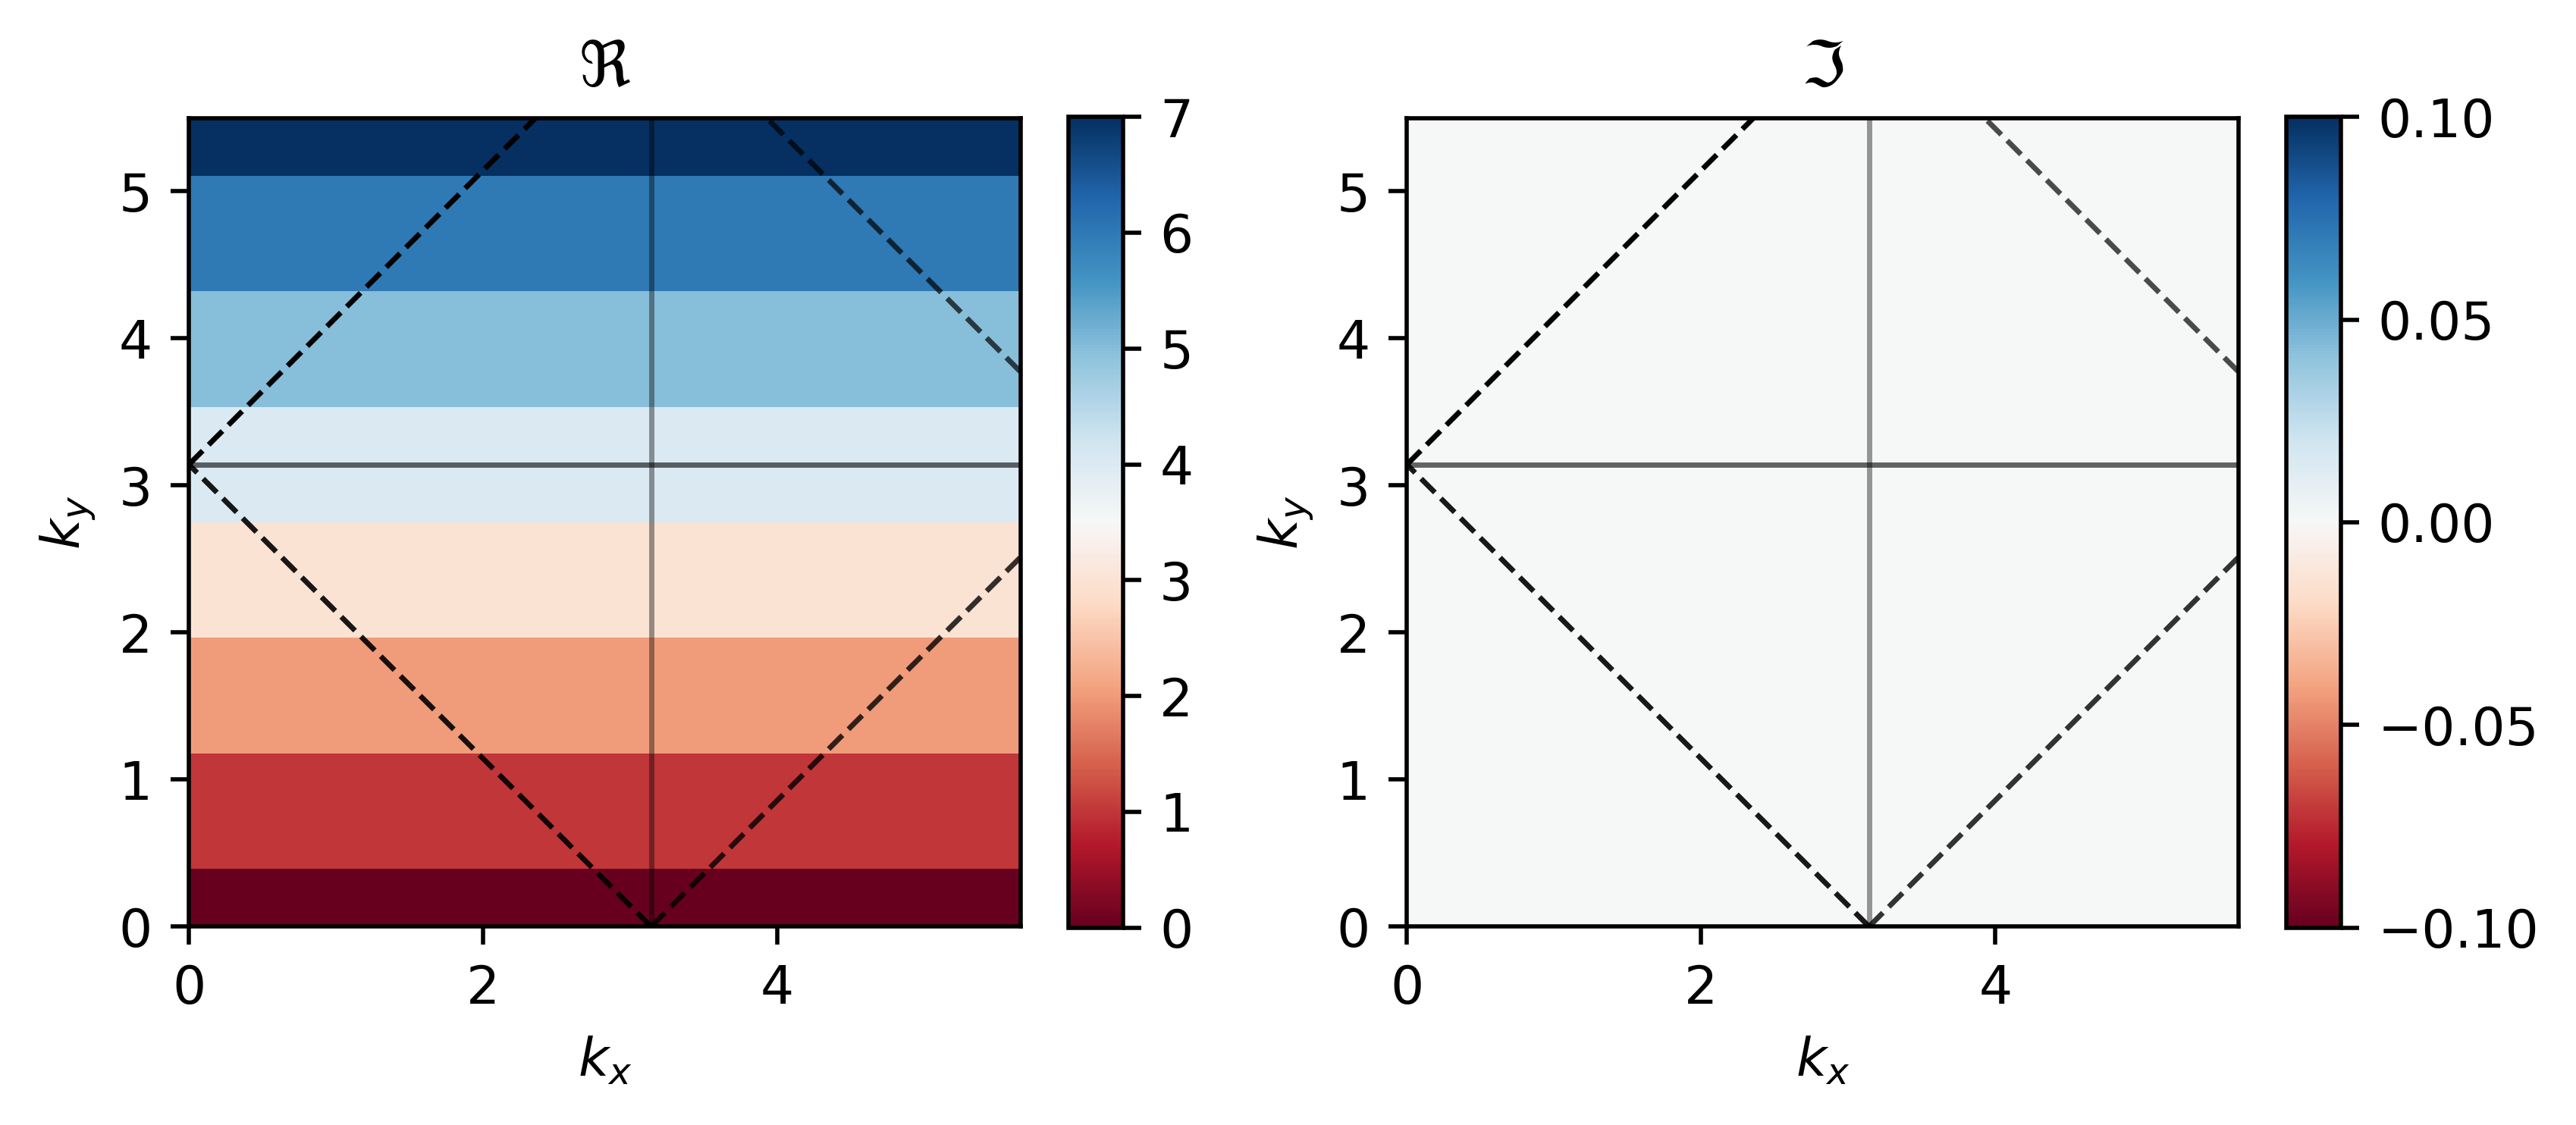

In [14]:
plotting.plot_kx_ky(k_grid2.kmesh_ind[0][:,:,0],k_grid2.kx,k_grid2.ky,do_save=False,verbose=True)
plotting.plot_kx_ky(k_grid2.kmesh_ind[1][:,:,0],k_grid2.kx,k_grid2.ky,do_save=False,verbose=True)

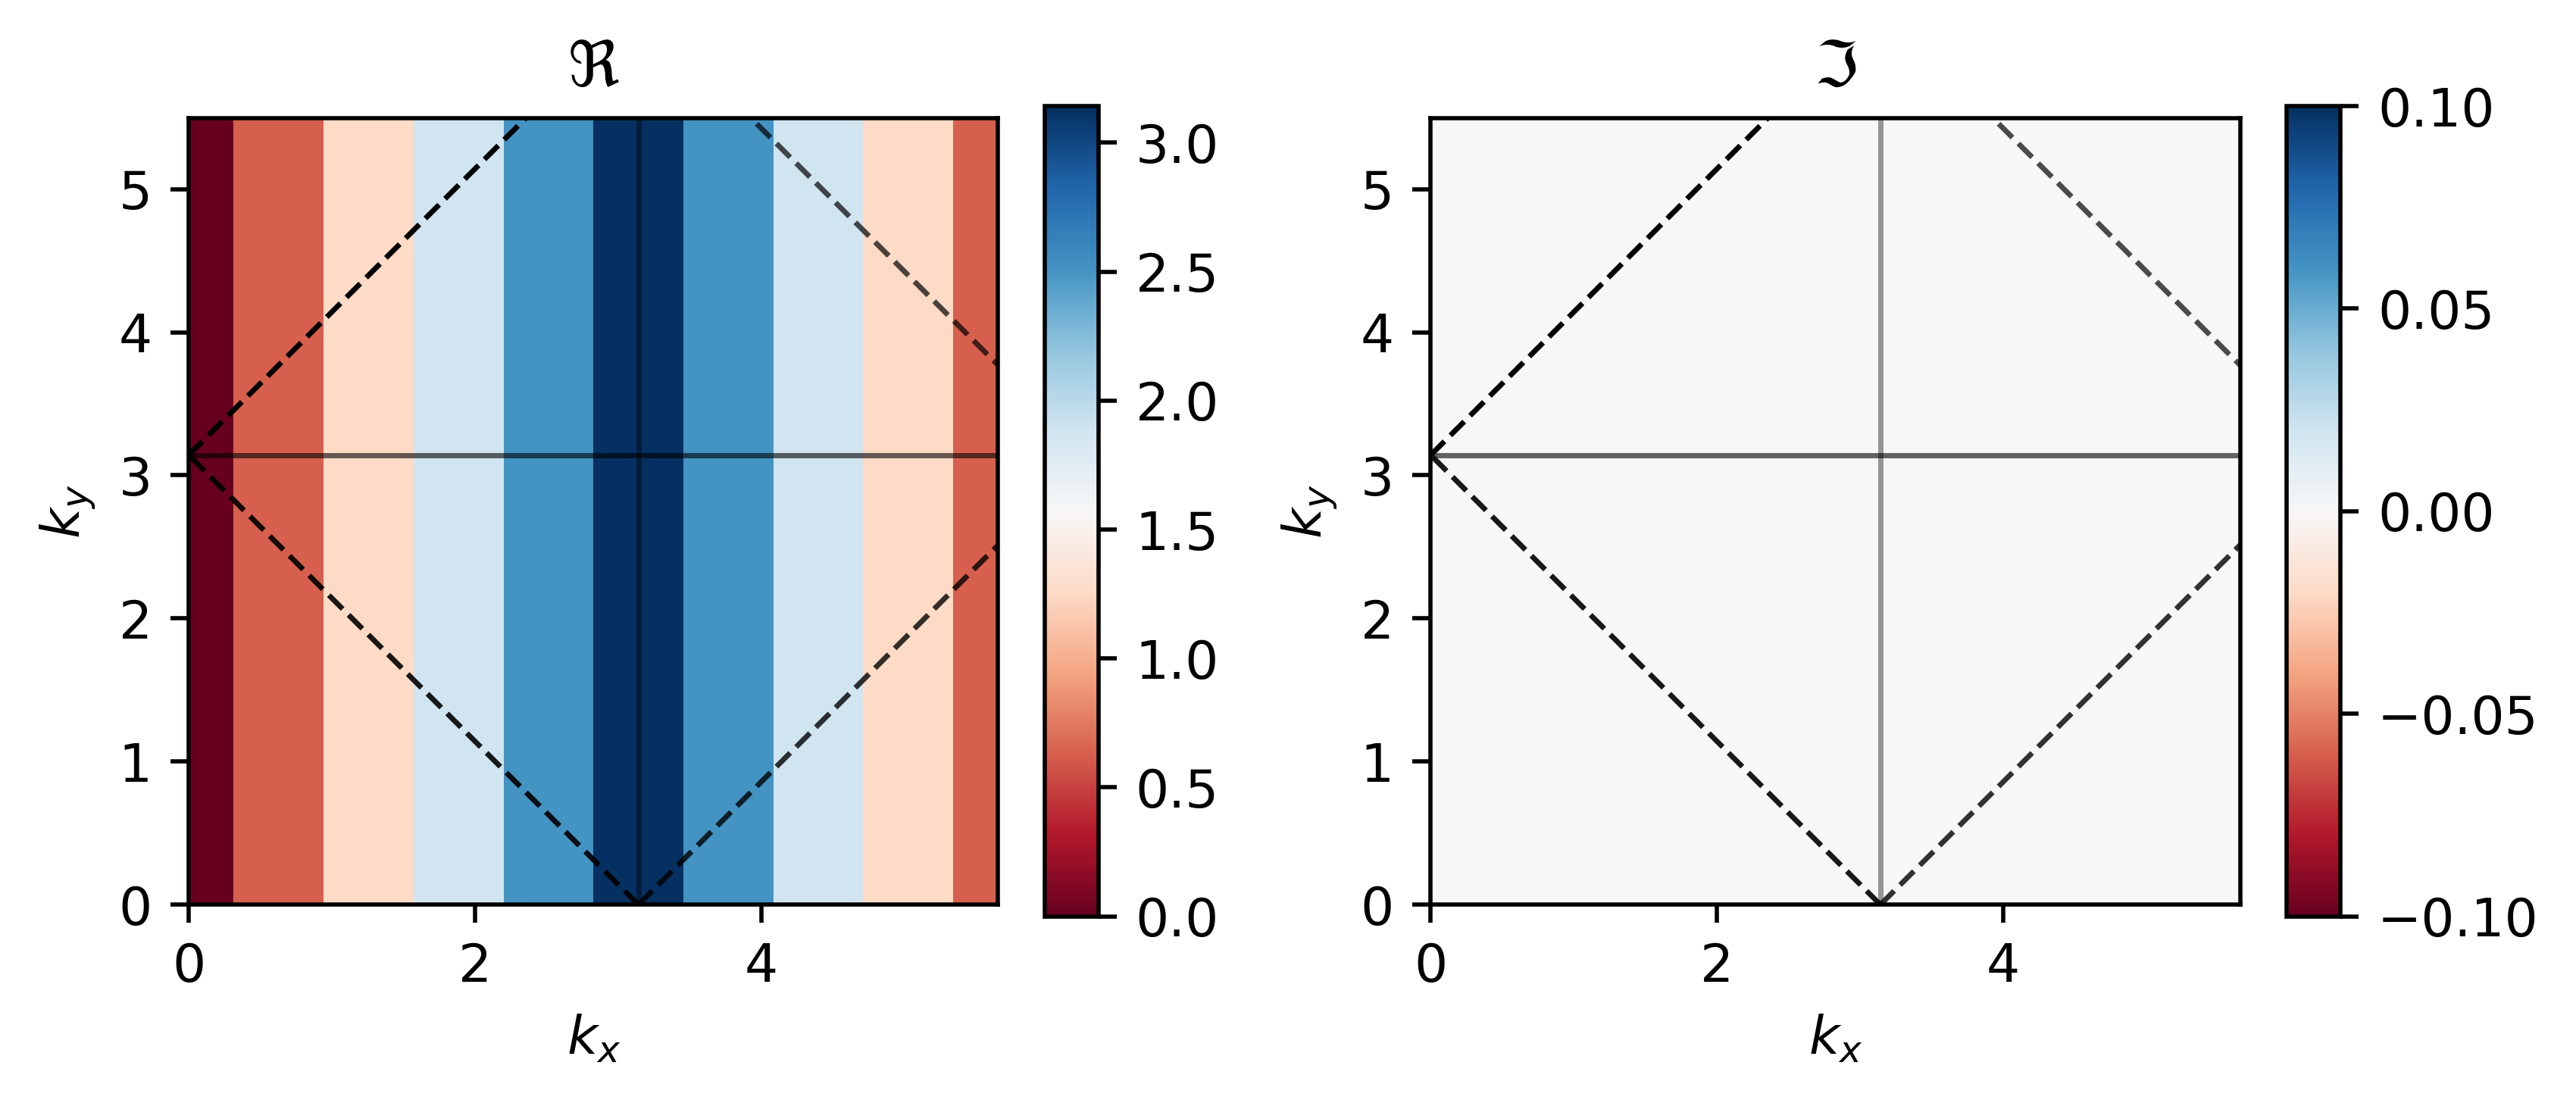

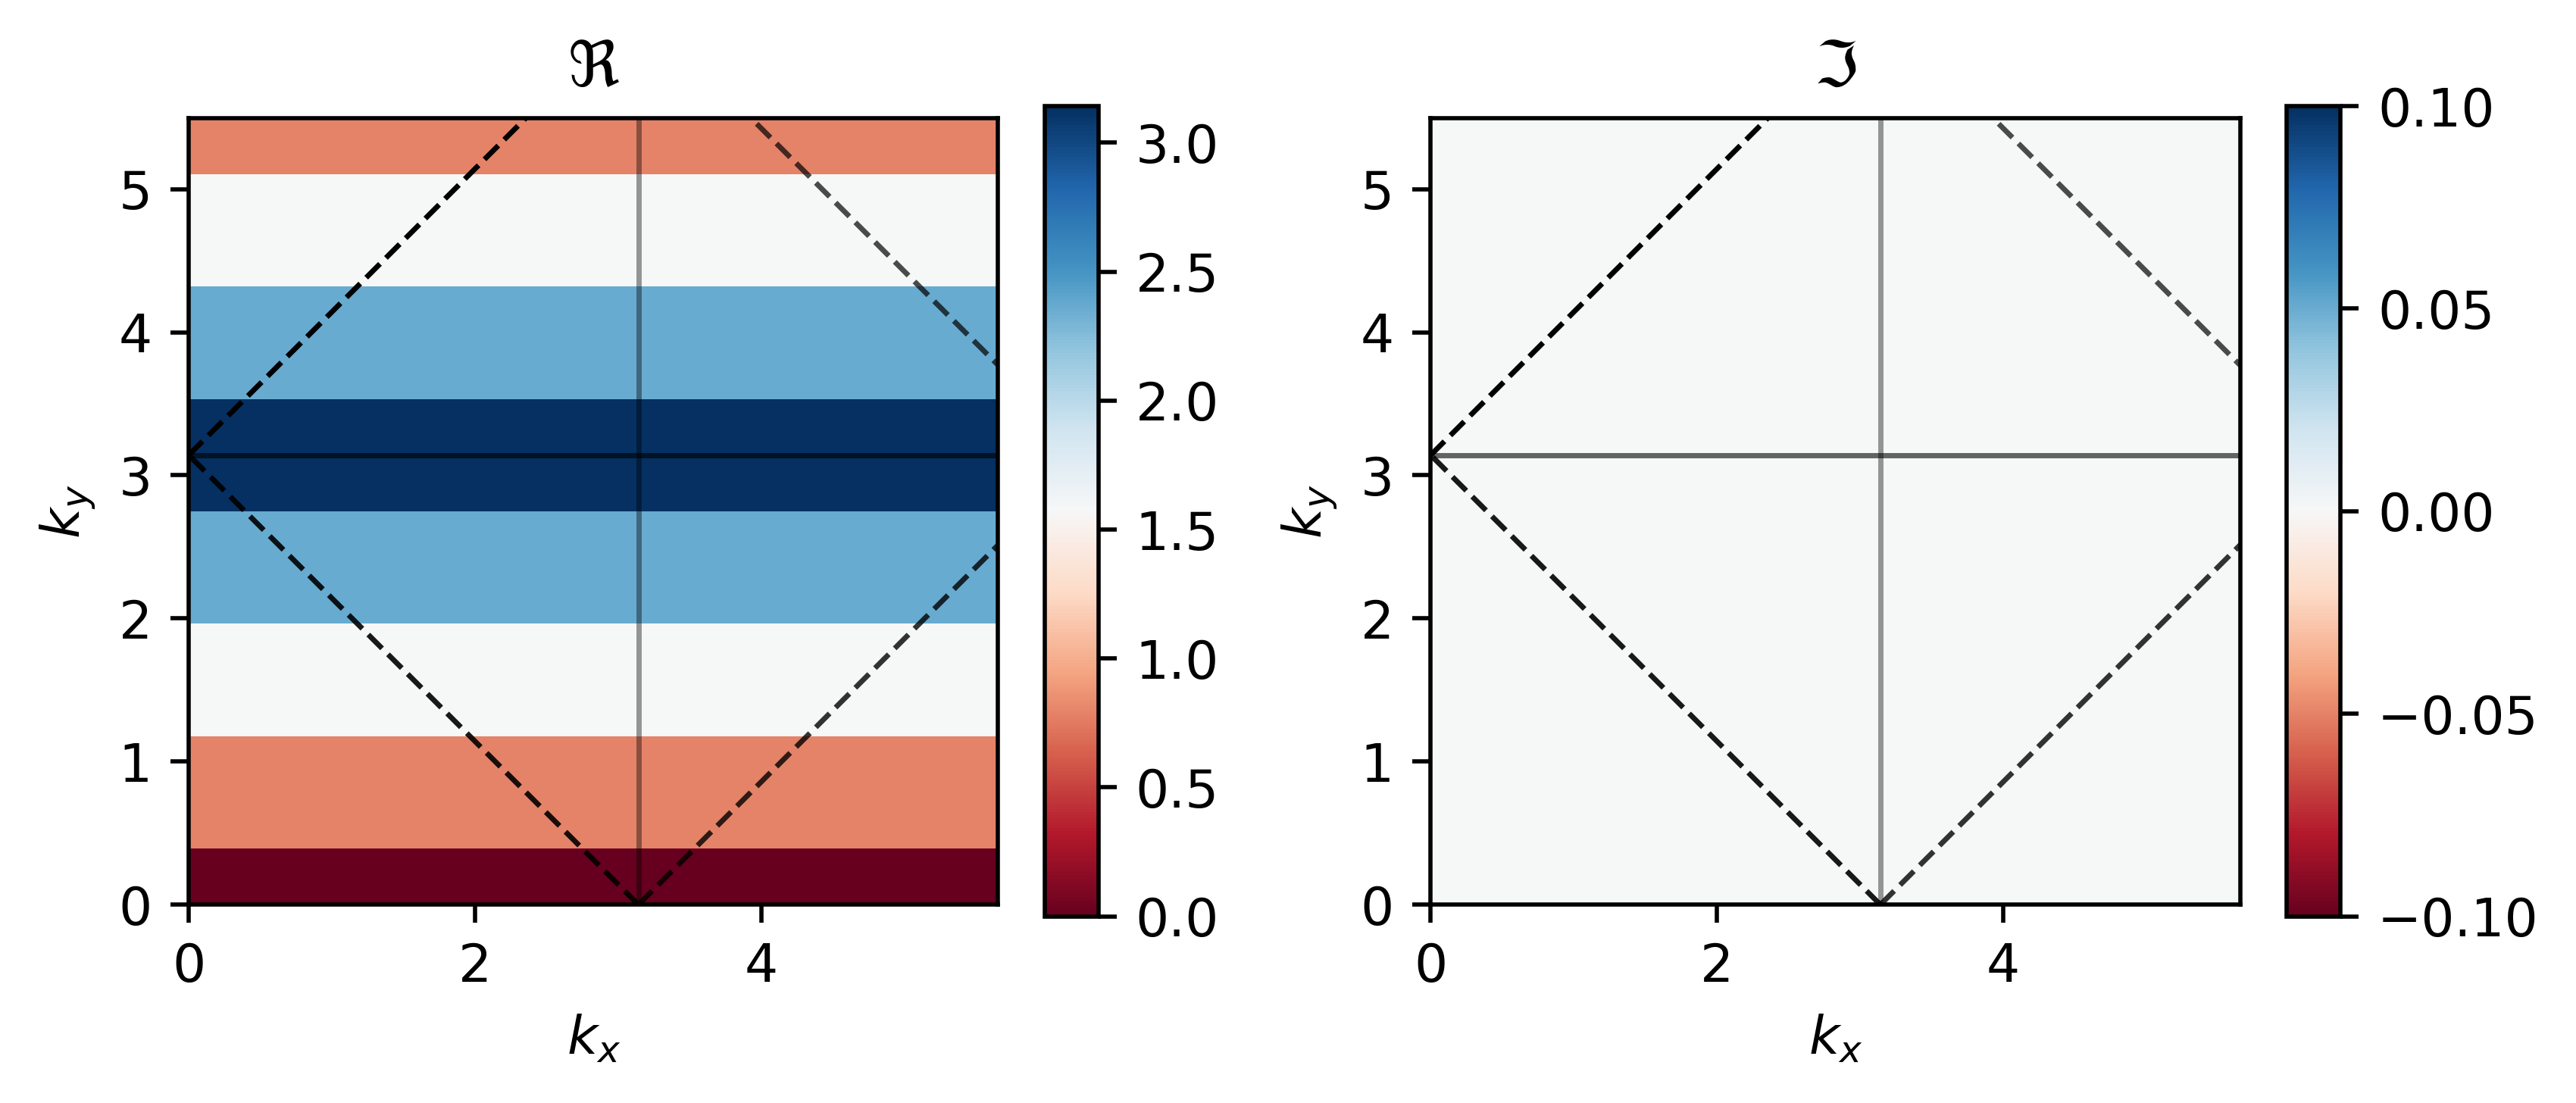

In [7]:
data = k_grid2.map_irrk2fbz(k_grid2.map_fbz2irrk(k_grid2.kmesh[0]))[:,:,0]
plotting.plot_kx_ky(data,k_grid2.kx,k_grid2.ky,do_save=False,verbose=True)
data = k_grid2.map_irrk2fbz(k_grid2.map_fbz2irrk(k_grid2.kmesh[1]))[:,:,0]
plotting.plot_kx_ky(data,k_grid2.kx,k_grid2.ky,do_save=False,verbose=True)

In [8]:
ind = 10
print(q_list_fbz2[ind])
print([-iq for iq in q_list_fbz2[ind]])

[1 2 0]
[-1, -2, 0]
